# Week5: Assignments
### Author: Ganesh Kale

import required packages

In [1]:
from tensorflow import keras
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Assignment 5.1: Classifying movie reviews: A binary classification example

In [2]:
# load the data

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# display train and test data sample

print(train_data[0])
train_labels[0]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


1

### Encoding the integer sequences into a binary matrix

In [4]:
#  create function to encode sequence

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# display sample of training data after encoding

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
# vectorize the lables

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Build the NN Model

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2022-04-17 10:56:30.634364: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Compile the model

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#### Splitting data into training and validation

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Train the model

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5071 - accuracy: 0.7899 - val_loss: 0.3863 - val_accuracy: 0.8703
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3069 - accuracy: 0.9043 - val_loss: 0.3096 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2246 - accuracy: 0.9288 - val_loss: 0.2816 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1792 - accuracy: 0.9407 - val_loss: 0.2817 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1454 - accuracy: 0.9545 - val_loss: 0.2880 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1201 - accuracy: 0.9633 - val_loss: 0.3103 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1005 - accuracy: 0.9703 - val_loss: 0.3057 - val_accuracy: 0.8841
Epoch 8/20
30

In [11]:
#  see the training history

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

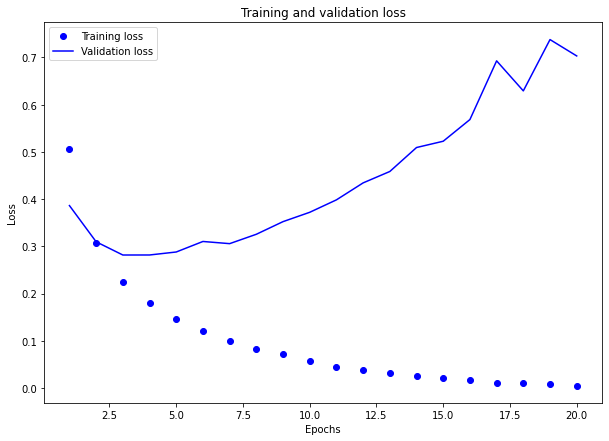

In [12]:
plt.figure(figsize=(10,7))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show();

#### Plotting the training and validation accuracy

<Figure size 432x288 with 0 Axes>

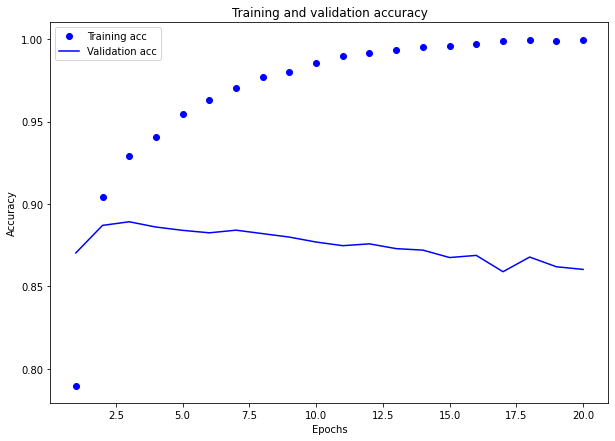

In [13]:
plt.clf()

plt.figure(figsize=(10,7))

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

#### Retraining a model from scratch - for 4 epochs

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4464 - accuracy: 0.8209
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2545 - accuracy: 0.9110
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1990 - accuracy: 0.9305
Epoch 4/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1652 - accuracy: 0.9422


782/782 [==============================] - 1s 1ms/step - loss: 0.2949 - accuracy: 0.8832


In [15]:
# display the result

results

[0.29487746953964233, 0.8831599950790405]

In [16]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

The accuracy of the model is 88.0%


#### generate predictions on new data

In [18]:
model.predict(x_test)[:5]

array([[0.16713482],
       [0.9998865 ],
       [0.88808084],
       [0.82244337],
       [0.957493  ]], dtype=float32)

## Further experiments

### Retraining a model from scratch - for 4 epochs with 3 hidden layers

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4451 - accuracy: 0.8171
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2477 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1917 - accuracy: 0.9286
Epoch 4/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1564 - accuracy: 0.9444


782/782 [==============================] - 1s 2ms/step - loss: 0.3205 - accuracy: 0.8773


In [20]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

# generate predictions on new data

model.predict(x_test)[:5]   

# it seems accuracy did not change by adding 1 extra hidden layer but the predictions got changed (less confident than 2 hidden layers)

The accuracy of the model is 88.0%


array([[0.12792876],
       [0.9995216 ],
       [0.39122823],
       [0.8492501 ],
       [0.95924145]], dtype=float32)

### Retraining a model from scratch - for 4 epochs with multiple hidden layer with 32 and 64 units

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4705 - accuracy: 0.7957
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2523 - accuracy: 0.9062
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1964 - accuracy: 0.9266
Epoch 4/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1653 - accuracy: 0.9374


782/782 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.8766


In [24]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

# generate predictions on new data

model.predict(x_test)[:5]  

# the accuracy unchanged but predictions improved

The accuracy of the model is 88.0%


array([[0.15022993],
       [0.9982275 ],
       [0.7006941 ],
       [0.62141013],
       [0.9588922 ]], dtype=float32)

### using the mse loss function instead of binary_crossentropy

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    # layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.1397 - accuracy: 0.8233
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0741 - accuracy: 0.9120
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0564 - accuracy: 0.9327
Epoch 4/4
49/49 [==============================] - 0s 8ms/step - loss: 0.0460 - accuracy: 0.9463


782/782 [==============================] - 1s 1ms/step - loss: 0.0868 - accuracy: 0.8819


In [26]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

# generate predictions on new data

model.predict(x_test)[:5]  

# the accuracy unchanged but predictions improved

The accuracy of the model is 88.0%


array([[0.16193843],
       [0.9994571 ],
       [0.7186584 ],
       [0.8249198 ],
       [0.9344305 ]], dtype=float32)

### using the tanh activation

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    # layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4295 - accuracy: 0.8295
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2442 - accuracy: 0.9133
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1829 - accuracy: 0.9337
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1516 - accuracy: 0.9462


782/782 [==============================] - 1s 1ms/step - loss: 0.3526 - accuracy: 0.8676


In [29]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

# generate predictions on new data

model.predict(x_test)[:5]  

# the accuracy changed to 87% (lowerd) and predictions too

The accuracy of the model is 87.0%


array([[0.04673791],
       [0.9957402 ],
       [0.64159715],
       [0.7986478 ],
       [0.95125973]], dtype=float32)

### END

----
---

# Assignment 5.2: Classifying newswires: A multiclass classification example

In [30]:
# loading the Reuters dataset

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [31]:
# display  records in each data set train and test

len(train_data)
len(test_data)

8982

2246

In [32]:
# display train data sample

print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [33]:
# Decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_newswire

565248/550378 [==============================] - 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [34]:
# label associated with an example is an integer between 0 and 45

train_labels[10]

3

Encoding the input data

In [35]:
 def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [36]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Encoding the labels

In [37]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [38]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Building your model

In [39]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

Compiling the model

In [40]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Setting aside a validation set

In [41]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 2.5408 - accuracy: 0.5276 - val_loss: 1.6787 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4003 - accuracy: 0.6993 - val_loss: 1.3064 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0647 - accuracy: 0.7719 - val_loss: 1.1450 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8489 - accuracy: 0.8148 - val_loss: 1.0541 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6837 - accuracy: 0.8519 - val_loss: 0.9991 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5532 - accuracy: 0.8870 - val_loss: 0.9521 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4438 - accuracy: 0.9083 - val_loss: 0.9330 - val_accuracy: 0.8120
Epoch 8/20
16

Plotting the training and validation loss

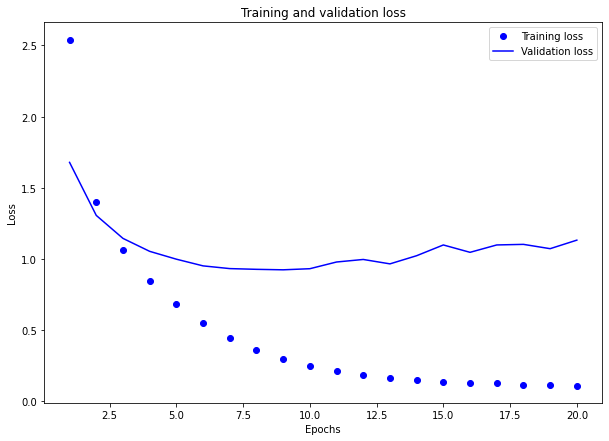

In [43]:
plt.figure(figsize=(10,7))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show();

Plotting the training and validation accuracy

<Figure size 432x288 with 0 Axes>

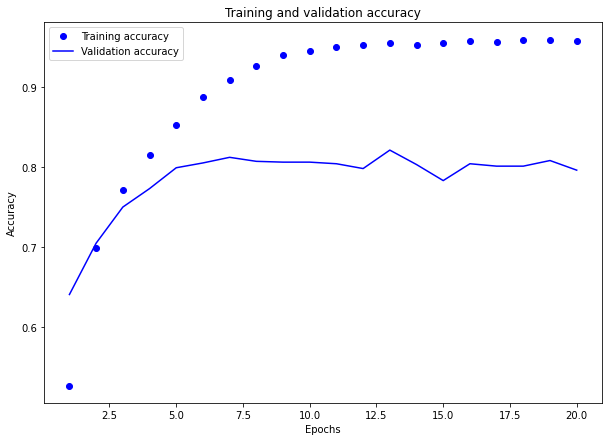

In [44]:
plt.clf()

plt.figure(figsize=(10,7))

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

Retraining a model from scratch

In [45]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5927 - accuracy: 0.5016
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3850 - accuracy: 0.7091
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0141 - accuracy: 0.7831
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.7921 - accuracy: 0.8359
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6271 - accuracy: 0.8736
Epoch 6/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4943 - accuracy: 0.9004
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4006 - accuracy: 0.9176
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3233 - accuracy: 0.9323
Epoch 9/9
18/18 [==============================] - 0s 14ms/step - loss: 0.2739 - accuracy: 0.9363


71/71 [==============================] - 0s 1ms/step - loss: 0.9757 - accuracy: 0.7930


In [46]:
# display the result

results

[0.9757130146026611, 0.792965292930603]

In [47]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

The accuracy of the model is 79.0%


predictions on new data

In [48]:
# predictions is a vector of length 46

predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [49]:
# The coefficients in this vector sum to 1

np.sum(predictions[0])

1.0

In [50]:
# the class with the highest probability

np.argmax(predictions[0])

3

different way to handle the labels and the loss

In [51]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [52]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

importance of having sufficiently large intermediate layers

In [58]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.9827 - accuracy: 0.2783 - val_loss: 2.3198 - val_accuracy: 0.5150
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.9482 - accuracy: 0.5520 - val_loss: 1.7176 - val_accuracy: 0.5660
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.5572 - accuracy: 0.5867 - val_loss: 1.5619 - val_accuracy: 0.6000
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3798 - accuracy: 0.6254 - val_loss: 1.5046 - val_accuracy: 0.6260
Epoch 5/20
63/63 [==============================] - 0s 8ms/step - loss: 1.2538 - accuracy: 0.6782 - val_loss: 1.4332 - val_accuracy: 0.6590
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 1.1540 - accuracy: 0.7005 - val_loss: 1.4248 - val_accuracy: 0.6590
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 1.0773 - accuracy: 0.7070 - val_loss: 1.4028 - val_accuracy: 0.6700
Epoch 8/20
63/63 [=

In [60]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

The accuracy of the model is 79.0%


## Further experiments

### using larger  layers: 64 & 128 units

In [62]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 1.7305 - accuracy: 0.6465 - val_loss: 1.2280 - val_accuracy: 0.7220
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 0.8294 - accuracy: 0.8234 - val_loss: 0.9432 - val_accuracy: 0.8160
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 0.5148 - accuracy: 0.8916 - val_loss: 0.8744 - val_accuracy: 0.8100
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 0.3381 - accuracy: 0.9297 - val_loss: 0.8765 - val_accuracy: 0.8210
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 0.2519 - accuracy: 0.9416 - val_loss: 1.0202 - val_accuracy: 0.7800
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.2052 - accuracy: 0.9493 - val_loss: 0.9425 - val_accuracy: 0.8160
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.1824 - accuracy: 0.9530 - val_loss: 0.9458 - val_accuracy: 0.8070
Epoch 8/20
63

In [63]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

The accuracy of the model is 79.0%


### using a single hidden layer

In [64]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    # layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/10
63/63 [==============================] - 1s 10ms/step - loss: 1.8914 - accuracy: 0.6450 - val_loss: 1.2381 - val_accuracy: 0.7370
Epoch 2/10
63/63 [==============================] - 0s 8ms/step - loss: 0.9599 - accuracy: 0.8004 - val_loss: 0.9955 - val_accuracy: 0.7900
Epoch 3/10
63/63 [==============================] - 1s 8ms/step - loss: 0.6554 - accuracy: 0.8688 - val_loss: 0.8869 - val_accuracy: 0.8200
Epoch 4/10
63/63 [==============================] - 1s 9ms/step - loss: 0.4665 - accuracy: 0.9030 - val_loss: 0.8266 - val_accuracy: 0.8300
Epoch 5/10
63/63 [==============================] - 0s 8ms/step - loss: 0.3476 - accuracy: 0.9251 - val_loss: 0.7994 - val_accuracy: 0.8270
Epoch 6/10
63/63 [==============================] - 0s 8ms/step - loss: 0.2697 - accuracy: 0.9394 - val_loss: 0.8088 - val_accuracy: 0.8230
Epoch 7/10
63/63 [==============================] - 1s 8ms/step - loss: 0.2202 - accuracy: 0.9473 - val_loss: 0.8350 - val_accuracy: 0.8260
Epoch 8/10
63/63 [=

In [65]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

The accuracy of the model is 79.0%


All three different expereints the accuracy did not change.

# END

----
---

# Assignment 5.3:Predicting house prices: A regression example

In [66]:
# Loading the Boston housing dataset


from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 1us/step


In [67]:
# display shape of datset


train_data.shape
test_data.shape

(404, 13)

(102, 13)

In [68]:
# display targets - sample

train_targets[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

Normalizing the data

In [69]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Building the model

In [70]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

Validating approach using K-fold validation

In [71]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0


Processing fold #1


Processing fold #2


Processing fold #3


In [72]:
all_scores

[2.084188222885132, 2.4565417766571045, 2.7027361392974854, 2.43930721282959]

In [73]:
np.mean(all_scores)

2.420693337917328

Saving the validation logs at each fold

In [74]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Building the history of successive mean K-fold validation scores

In [76]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Plotting validation scores

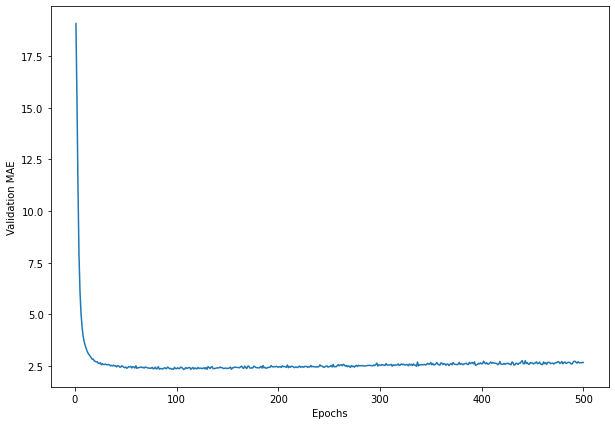

In [77]:
plt.figure(figsize=(10,7))

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show();

Plotting validation scores, excluding the first 10 data points

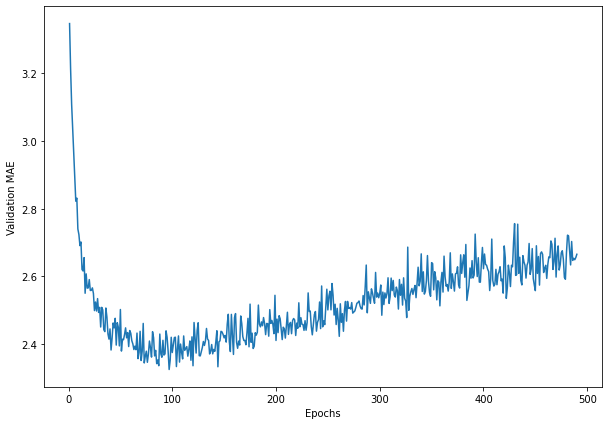

In [78]:
truncated_mae_history = average_mae_history[10:]
plt.figure(figsize=(10,7))

plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show();

In [79]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

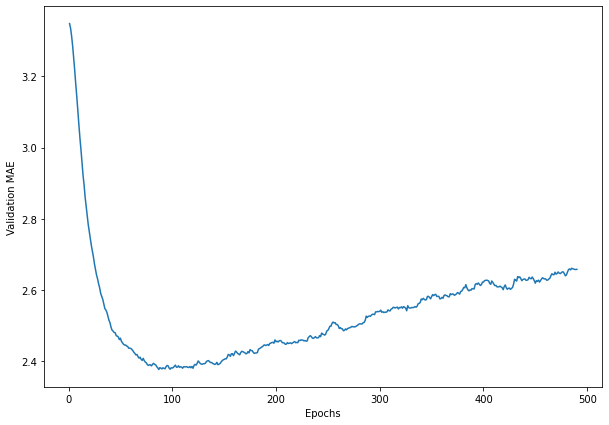

In [80]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.figure(figsize=(10,7))

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show();

Training the final model

In [81]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 13.2291 - mae: 2.3806


In [82]:
test_mae_score

2.380638837814331

predictions on new data

In [83]:
predictions = model.predict(test_data)
predictions[0]

array([9.273994], dtype=float32)

# END